In [28]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame
def get_pandora_data(filename):
    fp=open(filename)
    lines = fp.readlines()
    line_list = []
    lat_raw = lines[14]
    lon_raw = lines[15]
    lat = float(lat_raw.split()[-1])
    lon = float(lon_raw.split()[-1])
    del lines[0:92]
    for i in lines:
        line = i.split()
        line[19] = float(line[19])
        if len(line[0])<=16:
            line_list.append(line)
        elif len(line[0])>16:
            line[0] = line[0][0:15]+'Z'
    line_df = DataFrame(line_list)
    line_df = line_df[[0,13,19]]
    line_df['timestamp'] = pd.to_datetime(line_df[0],format='%Y%m%dT%H%M%SZ',errors = 'coerce')
    line_df = line_df[(line_df['timestamp']>= pd.to_datetime('20190101'))&(line_df['timestamp']<=pd.to_datetime('201912312359'))]
    line_df['quality_flag'] = line_df[13]
    line_df['NO2_trop_col'] = line_df[19]
    line_df = line_df[['timestamp','quality_flag','NO2_trop_col']]
    line_df['lon'] = lon
    line_df['lat'] = lat
    return line_df
BoulderCO = get_pandora_data('Pandora57s1_BoulderCO_L2Trop_rnvh1p1-7.txt')
print(BoulderCO.keys())
GreenbeltMD = get_pandora_data('Pandora32s1_GreenbeltMD_L2Trop_rnvh1p1-7.txt')
print(GreenbeltMD.keys())
MaunaLoaHI = get_pandora_data('Pandora59s1_MaunaLoaHI_L2Trop_rnvh1p1-7.txt')
print(MaunaLoaHI.keys())
NewHavenCT = get_pandora_data('Pandora64s1_NewHavenCT_L2Trop_rnvh1p1-7.txt')
print(NewHavenCT.keys())
NO2_col_NHCT = NewHavenCT['NO2_trop_col']
time_NHCT = NewHavenCT['timestamp']
NewHavenCT

Index(['timestamp', 'quality_flag', 'NO2_trop_col', 'lon', 'lat'], dtype='object')
Index(['timestamp', 'quality_flag', 'NO2_trop_col', 'lon', 'lat'], dtype='object')
Index(['timestamp', 'quality_flag', 'NO2_trop_col', 'lon', 'lat'], dtype='object')
Index(['timestamp', 'quality_flag', 'NO2_trop_col', 'lon', 'lat'], dtype='object')


,timestamp,quality_flag,NO2_trop_col,lon,lat
0,2019-09-11 16:03:43,1,0.51143,-72.9029,41.3014
1,2019-09-11 16:12:51,1,0.55913,-72.9029,41.3014
2,2019-09-11 16:21:55,1,0.48489,-72.9029,41.3014
3,2019-09-11 16:31:02,0,0.52629,-72.9029,41.3014
4,2019-09-11 16:42:19,0,0.43991,-72.9029,41.3014
...,...,...,...,...,...
4238,2019-12-15 18:44:29,0,0.15882,-72.9029,41.3014
4239,2019-12-15 18:55:04,0,0.16065,-72.9029,41.3014
4240,2019-12-15 19:08:04,0,0.13071,-72.9029,41.3014
4241,2019-12-15 19:26:43,2,0.15808,-72.9029,41.3014


I've found the problem, it's because pandas can't recognize scientific notation. I changed the type of the numbers into float and it worked out.

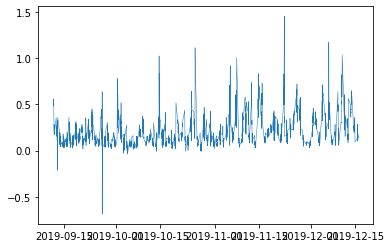

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.plot(time_NHCT,NO2_col_NHCT,linewidth=.5)
plt.show()

(array([1.000e+00, 1.000e+00, 3.000e+00, 2.459e+03, 1.334e+03, 3.180e+02,
        9.500e+01, 2.000e+01, 1.000e+01, 2.000e+00]),
 array([-0.68475 , -0.471095, -0.25744 , -0.043785,  0.16987 ,  0.383525,
         0.59718 ,  0.810835,  1.02449 ,  1.238145,  1.4518  ]),
 <BarContainer object of 10 artists>)

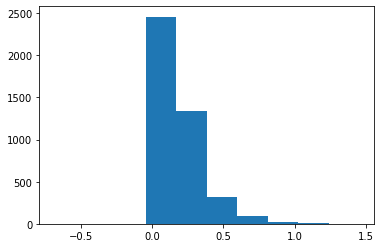

In [30]:
plt.hist(NewHavenCT['NO2_trop_col'])

In [31]:
NewHavenCT.shape

(4243, 5)